# This is Titanic Survival Prediction Project

In [288]:
# We are going to predict based on the data whether someone have survived or not

# Problem Definition

In [289]:
# Based on the given data we need to predicts whether a passenger on the Titanic survived or not.

In [290]:
# First Importing all the necessary libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [291]:
# loading the data
titanic = pd.read_csv("tested.csv")

In [292]:
titanic.shape

(418, 12)

In [293]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [294]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

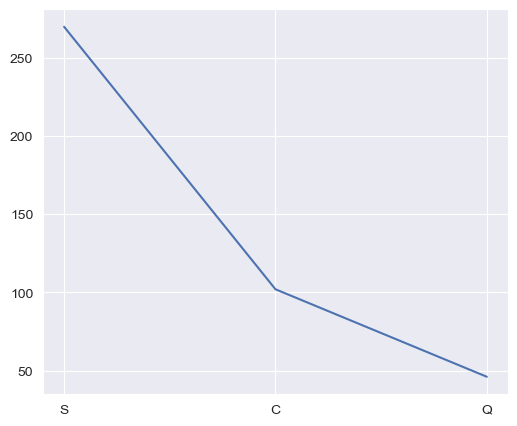

In [295]:
plt.plot(titanic['Embarked'].value_counts())

<Axes: >

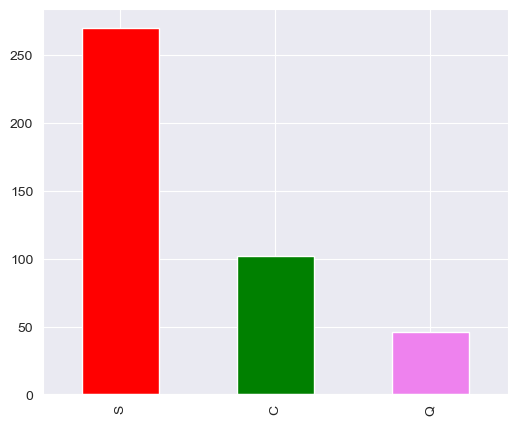

In [296]:
titanic["Embarked"].value_counts().plot(kind = "bar", color = ['red','green','violet'])
# with the help of bar plot we are checking in comparison of S,C,Q whose rate is highest and it is showing of S

In [297]:
# Whole Summary of the statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [298]:
# Checking for the missing(Nan) values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [299]:
titanic['Age'] = titanic['Age'].fillna(df.mean)
titanic['Cabin'] = titanic['Cabin'].fillna(df.mean)
titanic['Fare'] = titanic['Fare'].fillna(df.mean)

In [300]:
titanic.isna().sum()
# Now we are all set with the missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [301]:
# So checking for the datatype because we want the whole data to be in numbers
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

In [302]:
titanic.dtypes.value_counts()
# We have 4 str datatype which we have to convert into int

object    7
int64     5
dtype: int64

In [303]:
# Now we are converting the "Sex" column from str to int as male:0 & female:1
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

In [304]:
# Now Embarked has str dtype with three different values S,C,Q so naming them as 0,1,2
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0,'C':1,'Q':2}).astype(int)
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked        int32
dtype: object

In [305]:
# Previous method is unfortunately not working so now we are trying it with scikit-learn
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
titanic['Embarked'] = Encoder.fit_transform(titanic['Embarked'])
# titanic['Age'] = Encoder.fit_transform(titanic['Age'])
titanic['Ticket'] = Encoder.fit_transform(titanic['Ticket'])
titanic['Name'] = Encoder.fit_transform(titanic['Name'])

In [306]:
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name            int32
Sex             int64
Age            object
SibSp           int64
Parch           int64
Ticket          int32
Fare           object
Cabin          object
Embarked        int64
dtype: object

In [307]:
# removing the extra acolumn which are not in need to train and will not help in prediction

In [308]:
titanic = titanic.drop(['Fare','Cabin','Age'], axis = 1)

In [309]:
titanic.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Name           int32
Sex            int64
SibSp          int64
Parch          int64
Ticket         int32
Embarked       int64
dtype: object

In [310]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived'>

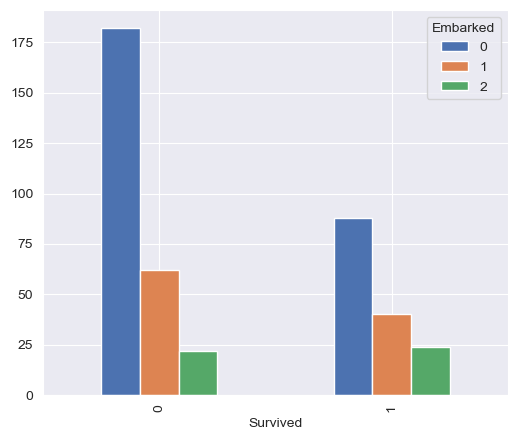

In [311]:
pd.crosstab(titanic.Survived, titanic.Embarked).plot(kind = 'bar')

C:\Users\bilal\AppData\Local\Temp\ipykernel_13768\527663804.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Male', "Female")


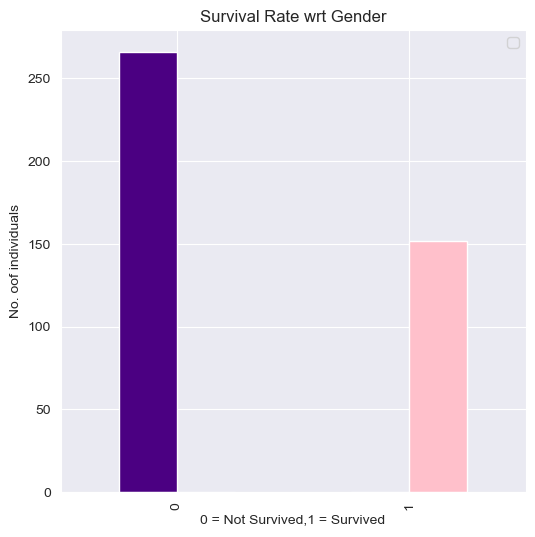

In [312]:
pd.crosstab(titanic.Survived, titanic.Sex).plot(kind = 'bar',
                                               figsize= (6,6),
                                                color = ['indigo','pink']
                                               )
plt.title("Survival Rate wrt Gender")
plt.xlabel("0 = Not Survived,1 = Survived")
plt.ylabel("No. oof individuals")
plt.legend('Male', "Female")

Text(0, 0.5, 'Count')

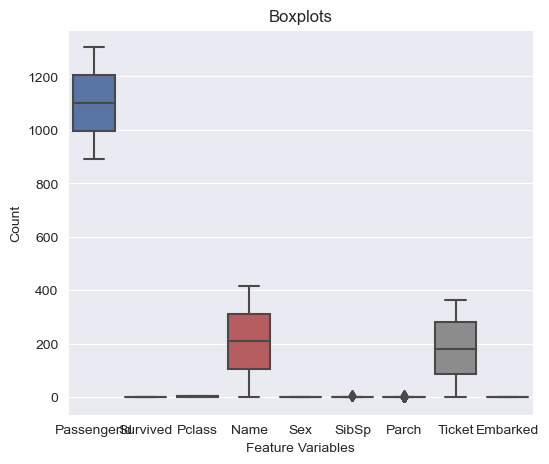

In [313]:
# looking for outliers through boxplot
sns.set({"figure.figsize":(6,5)})
sns.boxplot(titanic)
plt.title("Boxplots")
plt.xlabel("Feature Variables")
plt.ylabel("Count")

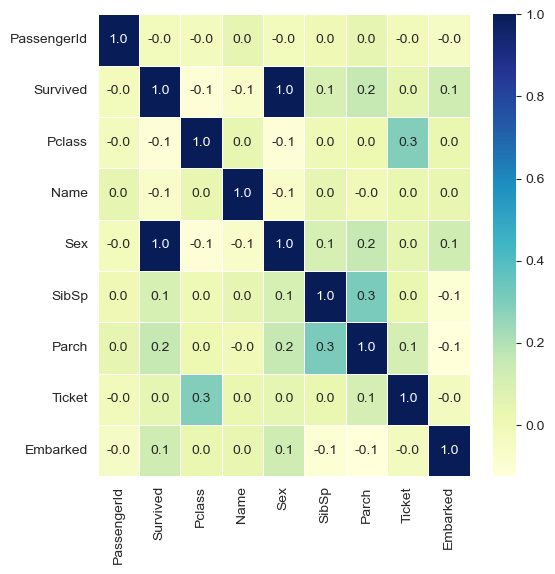

In [324]:
corr_map = titanic.corr()
home, room = plt.subplots(figsize = (6,6))
room = sns.heatmap(corr_map,
                   
                  annot = True,
                  linewidth = 0.5,
                  fmt = "0.1f",
                  cmap = "YlGnBu")

# Data Modelling

In [336]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
np.random.seed(7)
# Splitting the Data into X and y
X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

# Splitting the Data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

# Creating the instance 
sv =  SVC()

# Fitting the Model
sv.fit(X_train, y_train)

# Running the score
sv.score(X_test,y_test)

0.6666666666666666

In [335]:
# SVC is not giving the high score so lets try with RandomForestClassifier

In [340]:
from sklearn.ensemble import RandomForestClassifier

# Creating the instance 
clf = RandomForestClassifier()

# Fitting the Model
clf.fit(X_train, y_train)

# Running the score
clf.score(X_test,y_test)

1.0

In [348]:
clf.predict(X_test).mean()

0.3333333333333333

In [349]:
clf.predict_proba(X_test).mean()

0.5

In [360]:
# Plotting the Area Under The Curve(ROC)
from sklearn.metrics import roc_curve
y_predicted = clf.predict(X_test)
roc_curve = (y_predicted,X_test,y_test)
roc_curve

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
      PassengerId  Pclass  Name  Sex  SibSp  Parch  Ticket  Embarked
 232         1124       3   402    0      1      0     135         0
 223         1115       3   199    0      0      0     211         0
 60           952       3   115    0      0      0     199         0
 322         1214       2   274    0      0      0      80         0
 30           922       2   236    0      1      0     338         0
 ..           ...     ...   ...  ...    ...    ...     ...       ...
 249         1141       3   210    1      1      0     102         1
 188         1080       3   334    1      8      2     296         0
 89           981       2   392    0      1      1     130         0
 181       

In [368]:
confusion_matrix = (y_test,y_predicted)
confusion_matrix

(232    0
 223    0
 60     0
 322    0
 30     0
       ..
 249    1
 188    1
 89     0
 181    0
 346    0
 Name: Survived, Length: 84, dtype: int64,
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64))